<a href="https://colab.research.google.com/github/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/blob/main/Data_Collection_From_Twitter_For_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
!pip install tweet-preprocessor==0.6.0
!pip install tweepy==4.10.1
!pip install textblob==0.15.3
!pip install wordcloud==1.8.2.2
!pip install nltk==3.7
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import nltk
import re
import string 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [140]:
#Masukkan twitter token API
api_key = "UcVNXqPP4r4k10isPrN8Vv50J"
api_key_secret = "i7FyAvlWmVFaSE2ilPTnj51xKdZeh767exQ8ICHWJutUERntTk"
access_token = "907513785979592704-Dl1e8GTKqSZU6hAncjP6neOv2IZRpx1"
access_token_secret ="dC2BpeRVlgBQ7hWPt4hZjm9tSs0aB5DOd5doE3gEG9y9W"

# #Masukkan twitter token API
# api_key = "GbIGEYyXJW8RtX0KBxtzjNFWb"
# api_key_secret = "q47qwDYnsI9I6LAbifsQq5xULG4gYmiaOXD6iZZIjdKeNLXPT5"
# access_token = "847732131132358656-yvElNA1Ml5KM19Khl3CMNiMkb7Knk1Y"
# access_token_secret ="17KXZyRBfXmDK8UfsMozBnt3RP2C5vA8Rt8vA5rFHoUHY"

In [141]:
# melakukan authentication atau registrasi api key ke api twitter
auth = OAuthHandler(api_key, api_key_secret)
# Mendapat akses dari token yang didapat
auth.set_access_token(access_token, access_token_secret)
# memanggil API twitter
api = tweepy.API(auth)

In [ ]:
def scraptweets(search_words, date_since, date_until,  numTweets):

    db_tweets = pd.DataFrame(columns=['id', 'tweetcreatedts', 'username', 'text', 'source', 'like', 'retweet'])

    tweets = tweepy.Cursor(
                    api.search_tweets, q=search_words, lang="id", 
                    since=date_since, until=date_until,  tweet_mode='extended').items(numTweets)

    tweet_list = [tweet for tweet in tweets]

    for tweet in tweet_list:
        username = tweet.user.screen_name
        tweetcreatedts = tweet.created_at
        id_tweet = tweet.user.id
        source = tweet.source
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count

        try:
            text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.retweeted_status.full_text).split())
        except AttributeError:
            text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.full_text).split())

        ith_tweet = [id_tweet, tweetcreatedts, username, text, source, favorite_count, retweet_count]

        db_tweets.loc[len(db_tweets)] = ith_tweet
    
    print('Proses Scrapping Selesai Dengan Jumlah Data', len(db_tweets))
    filename = 'Data-hasil-crawling.csv'
    db_tweets.to_csv(filename, index=False)

today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(30)
last_week = last_week.strftime("%Y-%m-%d")

search_words = "#anies OR #aniesbaswedan OR #aniesrasyidbaswedan -filter:retweets"
date_since = last_week
date_until = today
numTweets = 500

scraptweets(search_words, date_since, date_until, numTweets)

In [143]:
data = pd.read_csv('Data-hasil-crawling.csv')
data.sample(n=5)

,id,tweetcreatedts,username,text,source,like,retweet
120,1613864210278256641,2023-02-27 01:28:25+00:00,andrikingo77,Hahaha kuda aja gamau tuh diajak jalan bareng ...,Twitter for Android,0,0
21,314110316,2023-02-27 14:08:15+00:00,PKSKotaSolo,Senam Kader dengan Ketua MS PKS Salim Segaf Al...,Twitter for Android,6,3
124,1482244610,2023-02-27 00:35:31+00:00,corongnusantara,PKS Tak Menutup Kemungkinan Koalisi Perubahan ...,corong nusantara,0,0
336,1488856847381450755,2023-02-25 03:36:42+00:00,DidiekHadi,Anies Sebut PKS Banyak Dirayu hingga Diancam k...,Twitter for Android,0,0
369,1613864210278256641,2023-02-25 00:08:42+00:00,andrikingo77,Gimana yaa wkwk jadi pengen ketawa aja deh abi...,Twitter for Android,0,0


In [144]:
data.isnull().sum()

id                0
tweetcreatedts    0
username          0
text              0
source            0
like              0
retweet           0
dtype: int64

In [145]:
#Mengganti format tanggal
tanggal = pd.to_datetime(data['tweetcreatedts'])
data['tweetcreatedts'] = tanggal.dt.strftime('%d/%m/%Y %H:%M')
data['tweetcreatedts']

0      27/02/2023 23:57
1      27/02/2023 23:20
2      27/02/2023 23:15
3      27/02/2023 22:56
4      27/02/2023 22:49
             ...       
495    24/02/2023 02:17
496    24/02/2023 02:17
497    24/02/2023 02:17
498    24/02/2023 02:17
499    24/02/2023 02:17
Name: tweetcreatedts, Length: 500, dtype: object

In [146]:
#Mengecek informasi pada kolom dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              500 non-null    int64 
 1   tweetcreatedts  500 non-null    object
 2   username        500 non-null    object
 3   text            500 non-null    object
 4   source          500 non-null    object
 5   like            500 non-null    int64 
 6   retweet         500 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.5+ KB


In [147]:
# Menampilkan semua tanda baca dalam bentuk string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [148]:
# Menghilangkan tanda baca dan karakter yang tidak diperlukan
def remove_punct(Tweets):
      #Menggabungkan karakter pada tweet
      Tweets = "".join([char for char in Tweets if char not in string.punctuation])
      #Menghilangkan angka
      Tweets = re.sub('[0-9]+', '', Tweets)
      #Menghilangkan url web
      Tweets = re.sub(r"http\S+", "", Tweets)
      Tweets = re.sub(r"www.\S+", "", Tweets)
      #Mengganti tweet ke huruf kecil  
      Tweets = Tweets.lower()
      return Tweets

# Menggunakan function pada kolom tweet
data['text'] = data['text'].apply(lambda x: remove_punct(x))
data.head()

,id,tweetcreatedts,username,text,source,like,retweet
0,1613864210278256641,27/02/2023 23:57,andrikingo77,pak anies mah cuma bisa ngomong doang gaada ke...,Twitter for Android,0,0
1,1497786677254709256,27/02/2023 23:20,riauku_id,hahahahahaa apa nggak ikut nyalahin aniesbaswe...,Twitter for Android,0,0
2,1429787631496220677,27/02/2023 23:15,ommi_siregar,orang yang hatinya bersih akan melihat orang l...,Twitter for Android,29,10
3,71512327,27/02/2023 22:56,moreshare,ngakak anies ngajak balik ke era sby disentil ...,ms-room.com,0,0
4,2879211871,27/02/2023 22:49,JatengTV,pemilik pt perorangan tak perlu bayar pajak p...,twittbot.net,0,0


In [149]:
#Menghilangkan duplikat pada tweet
data = data.reset_index(drop=True).drop_duplicates(subset='text', keep="last", ignore_index=True)
data

,id,tweetcreatedts,username,text,source,like,retweet
0,1613864210278256641,27/02/2023 23:57,andrikingo77,pak anies mah cuma bisa ngomong doang gaada ke...,Twitter for Android,0,0
1,1497786677254709256,27/02/2023 23:20,riauku_id,hahahahahaa apa nggak ikut nyalahin aniesbaswe...,Twitter for Android,0,0
2,1429787631496220677,27/02/2023 23:15,ommi_siregar,orang yang hatinya bersih akan melihat orang l...,Twitter for Android,29,10
3,71512327,27/02/2023 22:56,moreshare,ngakak anies ngajak balik ke era sby disentil ...,ms-room.com,0,0
4,2879211871,27/02/2023 22:49,JatengTV,pemilik pt perorangan tak perlu bayar pajak p...,twittbot.net,0,0
...,...,...,...,...,...,...,...
395,630088310,24/02/2023 02:17,SHOPIEFELLA,janji nasdem mah cuman abal abal doang anies,SocialPilot.co,0,0
396,630088310,24/02/2023 02:17,SHOPIEFELLA,kecewa masyarakat dengan program anies anies,SocialPilot.co,0,0
397,630088310,24/02/2023 02:17,SHOPIEFELLA,rugi masyarakat dipimpin anies anies,SocialPilot.co,0,0
398,630088310,24/02/2023 02:17,SHOPIEFELLA,permainan anies mempermainkan masyarakat indon...,SocialPilot.co,0,0


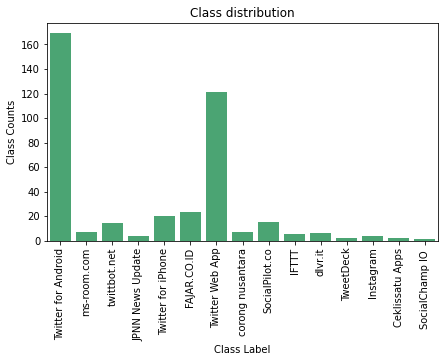

In [150]:
plt.figure(figsize=(7,4))
sns.countplot(x=data.source, color='mediumseagreen')
plt.title('Class distribution')
plt.ylabel('Class Counts')
plt.xlabel('Class Label')
plt.xticks(rotation='vertical');

In [151]:
def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

data['tweet_clean'] = data['text'].apply(preprocessing_data)
data['tweet_clean'] = data['tweet_clean'].apply(tokenize_data)
data = data.drop_duplicates()

In [152]:
# Kalau time out ubah variabel translate
from googletrans import Translator
translater = Translator()

def convert_eng(tweet):
    return translater.translate(tweet, dest='en').text

data['tweet_english'] = data['tweet_clean'].apply(convert_eng)

In [153]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

data['tweet_english'] = data['tweet_english'].apply(stemming_data)

In [154]:
# data_tweet = list(data['tweet_english'])
# polaritas = 0

# status = []
# total_positif = total_negatif = total_netral = total = 0

# def klasifikasi(polaritas):
#     if polaritas > 0.0:
#         return 'Positif'
#     elif polaritas > 0.0 == 0.0:
#         return 'Netral'
#     else:
#         return 'Negatif'

# for i, tweet in enumerate(data_tweet):
#     analysis = TextBlob(tweet)
#     polaritas += analysis.polarity

#     if analysis.sentiment.polarity > 0.0:
#         total_positif += 1
#         status.append('Positif')
#     elif analysis.sentiment.polarity == 0.0:
#         total_netral += 1
#         status.append('Netral')
#     else:
#         total_negatif += 1
#         status.append('Negatif')

#     total += 1 

# status = pd.DataFrame({'klasifikasi': status})
# data['klasifikasi'] = status
# data.tail()

# print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
# print(f'\nTotal Data : {total}')

In [155]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total = 0

def klasifikasi(polaritas):
    if polaritas > 0.0:
        return 'Positif'
    else:
        return 'Negatif'

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1 

status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.tail()

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 170
Negatif = 230

Total Data : 400


In [156]:
data.to_excel('Data-hasil-klasifikasi3.xlsx', index=False)

In [157]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

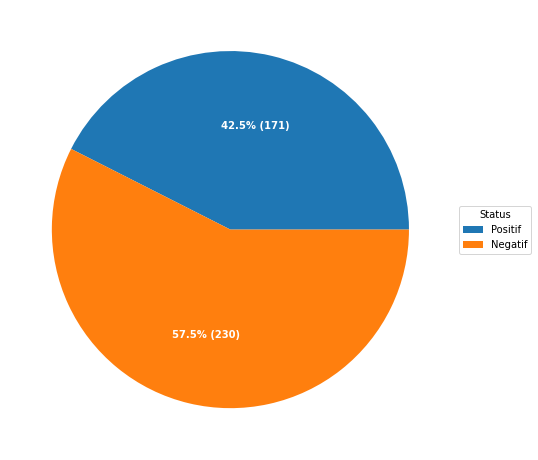

In [158]:
label = ['Positif', 'Negatif']
count_data = [total_positif+1, total_negatif+1]

show_pie(label, count_data, "Status")

In [159]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

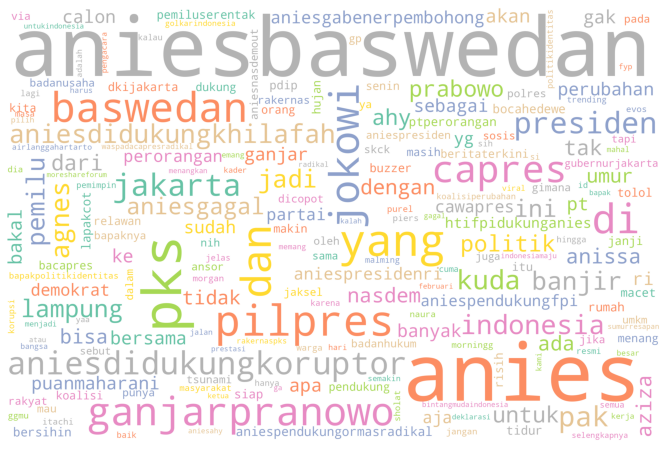

In [160]:
all_words = ' '.join([tweets for tweets in data['tweet_clean']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

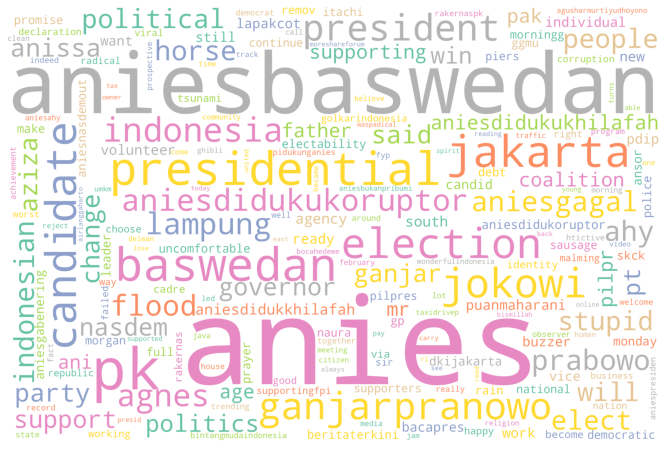

In [161]:
all_words = ' '.join([tweets for tweets in data['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)